In [5]:
#load_mnist 정의
import os
import struct
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
import gzip
from functions import *
from gradient import numerical_gradient



def load_mnist(path, kind='train'):
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte' % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(len(labels), 784)


    return images, labels




In [6]:
x_train, t_train = load_mnist('/dataset', kind='train')
x_test, t_test = load_mnist('/dataset', kind='t10k')


print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


FileNotFoundError: [Errno 2] No such file or directory: '/dataset\\train-labels-idx1-ubyte'

<ipython-input-152-f47fa9803a8f>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


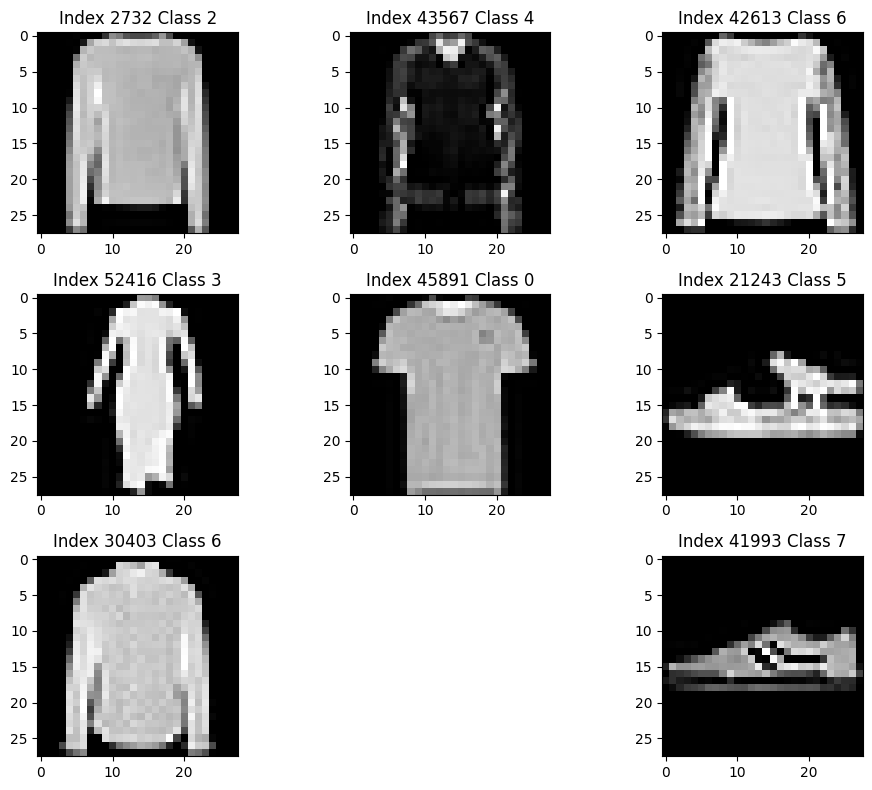

In [ ]:
o_train = x_train.shape[0]
o_test = x_test.shape[0]


np.random.seed(0);
la = list(np.random.randint(o_train,size=9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[la[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Index {} Class {}".format(la[i], t_train[la[i]]))
    plt.tight_layout()

In [ ]:
print("Feature Values: \nFrom " + str(np.min(x_train)) + " to " + str(np.max(x_train)))
print("Data type: " + str(x_train.dtype))
print("\nLabel Values: ")
print(set(list(t_train)))
print("Data type: " + str(t_train.dtype))

Feature Values: 
From 0 to 255
Data type: uint8

Label Values: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Data type: uint8


In [21]:
class ThreeLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, input_size)
        self.params['b2'] = np.zeros(input_size)
        self.params['W3'] = weight_init_std * np.random.randn(input_size, output_size)
        self.params['b3'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        y = softmax(a3)

        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])


        return grads



    def gradient(self, x, t):
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        y = softmax(a3)

        return grads


network = ThreeLayerNet(input_size=784, hidden_size=100, output_size=10)
print("network.params.keys():",network.params.keys())

x = np.random.rand(100, 784)  # 100개의 데이터를 무작위로 생성
t = np.random.rand(100, 10)   # 100개의 레이블을 무작위로 생성

# 그래디언트 계산
grads = network.gradient(x, t)

# 그래디언트의 키 출력
print("grads.keys():         ",grads.keys(),"반환 된 것이 없습니다.")
print()
print("self.grads['W1'] = gradient 계산값")
print("self.grads['b1'] = gradient 계산값")       
print("self.grads['W2'] = gradient 계산값")
print("self.grads['b2'] = gradient 계산값")
print("self.grads['W3'] = gradient 계산값")
print("self.grads['b3'] = gradient 계산값")

network.params.keys(): dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
grads.keys():          dict_keys([]) 반환 된 것이 없습니다.

self.grads['W1'] = gradient 계산값
self.grads['b1'] = gradient 계산값
self.grads['W2'] = gradient 계산값
self.grads['b2'] = gradient 계산값
self.grads['W3'] = gradient 계산값
self.grads['b3'] = gradient 계산값


In [ ]:
x_train, t_train = load_mnist('/content', kind='train')
x_test, t_test = load_mnist('/content', kind='t10k')

x_train = x_train / 255.0
x_test = x_test / 255.0





train_loss_list = []

#하이퍼파라미터
iters_num =  1000 # 반복횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

network = ThreeLayerNet(input_size=784, hidden_size=110, output_size=10)

for i in range(iters_num):
  #미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]


  #기울기 계산
  grad = network.gradient(x_batch, t_batch)

  #매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
    network.params[key] -= learning_rate * grad[key]
  #학습 경과기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)




KeyError: ignored

In [ ]:
#검증
network = ThreeLayerNet(input_size=784, hidden_size=110, output_size=10)


#하이퍼파라미터
iters_num =  2000 # 반복횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1



train_loss_list = []
train_acc_list = []
test_acc_list = []


#1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)


for i in range(iters_num):
  #미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]



#기울기 계산
  grad = network.gradient(x_batch, t_batch)


#매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
     network.params[key] -= learning_rate * grad[key]


#학습 경과기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)


#정확도 계산
if i % iter_per_epoch == 0:
  train_acc = network.accuracy(x_train, t_train)
  test_acc = network.accuracy(x_test, t_test)
  train_acc_list.append(train_acc)
  test_acc_list.append(test_acc)
  print("train acc, test acc | "
         + str(train_acc) + ", " + str(test_acc))




KeyError: ignored